### Import library

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

### Add audio file 

In [3]:
file_path = 'D:\workspace\Audio_Pitch_Detection_Using_STFT\studio_female.wav'
y, sr = librosa.load(file_path, sr=None)

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\QUOCCUONG\AppData\Local\Temp\ipykernel_2932\1807337565.py:1: SyntaxWarning: invalid escape sequence '\w'
  file_path = 'D:\workspace\Audio_Pitch_Detection_Using_STFT\studio_female.wav'


### Perform STFT on the audio signal

In [4]:
n_fft = 2048  # Kích thước FFT
hop_length = 512  # Khoảng cách giữa các khung
stft_result = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
stft_magnitude = np.abs(stft_result)

### Create a time-frequency spectrum chart

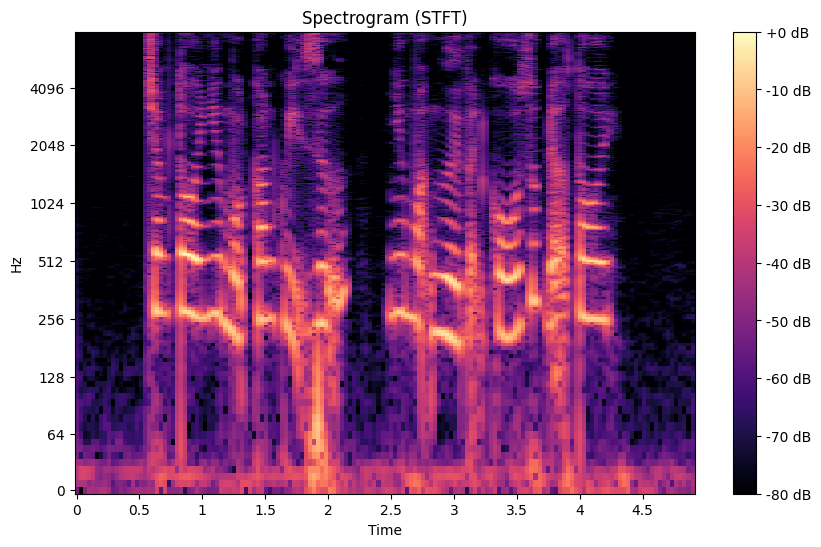

In [5]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(librosa.amplitude_to_db(stft_magnitude, ref=np.max), sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.title('Spectrogram (STFT)')
plt.colorbar(format='%+2.0f dB')
plt.show()

### Find F0 using the Harmonic method

In [6]:
f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

### Draw the F0 graph

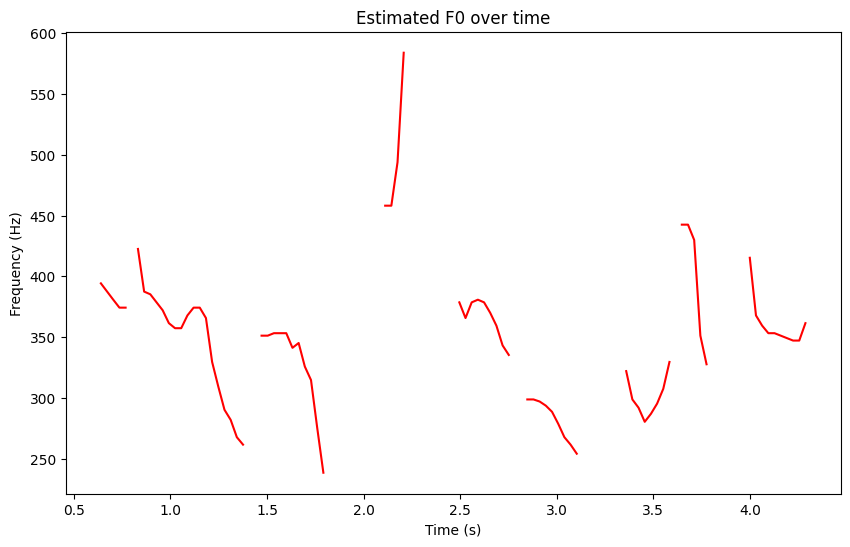

In [7]:
plt.figure(figsize=(10, 6))
times = librosa.times_like(f0, sr=sr, hop_length=hop_length)
plt.plot(times, f0, label='F0', color='r')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Estimated F0 over time')
plt.show()

### Print F0

In [8]:
print(f"Estimated F0: {f0}")

Estimated F0: [         nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
 394.26624244 387.49298438 380.83608684 374.29355082 374.29355082
          nan 422.56409582 387.49298438 385.26118902 378.64263239
 372.1377786  361.54373842 357.3910544  357.3910544  367.86341165
 374.29355082 374.29355082 365.7446743  329.62755691 309.33502416
 290.29174037 282.02769802 267.74077301 261.6255653           nan
          nan 351.25129    351.25129    353.28606802 353.28606802
 353.28606802 341.2518476  345.21700307 325.8414615  314.74210514
 275.5861765  238.52991147          nan          nan          nan
          nan          nan          nan          nan          nan
          nan 458.15534712 458.15534712 493.88330126 583.94676663
          nan          nan          nan          nan          